# YouTube trending videos

In [36]:
%matplotlib inline

import sys
sys.path.append('..')

import numpy as np
import pandas as pd
from numpy import nan

from typing import List
# import re
# from IPython.display import Image

import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

from helpers.categories import get_categories_dict
from helpers.files import load_csv

## Etap 3 - Ocena ważności atrybutów


### Wczytanie danych zgrupowanych po id

TODO trending days

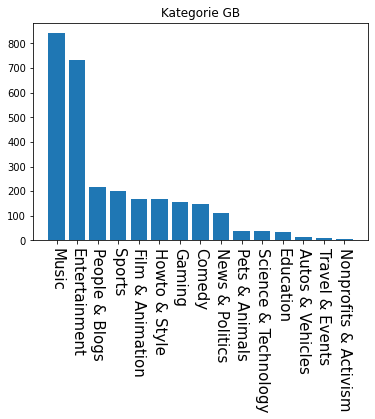

Kategorie GB Liczba wartości 'nan':394


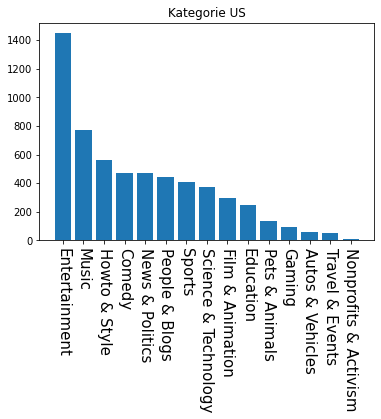

Kategorie US Liczba wartości 'nan':494


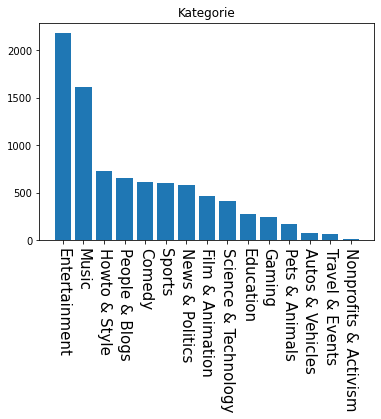

Kategorie Liczba wartości 'nan':888


In [37]:
numeric_attrs = [
    "views", "likes", "dislikes", "comment_count", "description_len", "title_len", "channel_title_len",
    "publish_time_day_of_week", "publish_time_hour_of_day"
]


def plot_categories(title: str, categories_dict: dict, data: pd.DataFrame) -> list:
    nan_count = data["new_category_id"].isna().sum()
    plt.title(title)
    attr_c = data["new_category_id"].value_counts()
    attr_c = attr_c.rename_axis("new_category_id").reset_index(name="count")
    labels = [categories_dict[i] for i in attr_c["new_category_id"]]
    plt.bar(labels, attr_c["count"])
    plt.xticks(rotation=270, fontsize=15)
    plt.show()

    print(f"{title} Liczba wartości 'nan':{nan_count}")
    return attr_c["new_category_id"].tolist()


data_dir = "ped3_data"
gb_videos, us_videos = load_csv(data_dir)
videos = pd.concat([gb_videos, us_videos])
for name in numeric_attrs:
    videos[name] = videos[name].apply(lambda x: eval(x))
videos.head(10)

categorical_attrs = ["video_id", "thumbnail_link", "comments_disabled", "ratings_disabled", "video_error_or_removed",
                     "trending_date"]

for name in categorical_attrs:
    videos[name] = videos[name].apply(lambda x: eval(x)[-1] if eval(x) else np.nan)

categories_dict = get_categories_dict()

d = [gb_videos, us_videos]
names = ["Kategorie GB", "Kategorie US"]
for df, name in zip(d, names):
    plot_categories(name, categories_dict, df)
categories = plot_categories("Kategorie", categories_dict, videos)


Patrząc na wykresy kategorii o można zauważyć znaczne różnice
pomiędzy wielkością zbiorów filmów w poszczególnych kategoriach. Takie
niezbalansowanie będzie trzeba mieć na uwadze, przechodząc do kolejnego
etapu przy uczeniu modeli.

In [38]:
for i in numeric_attrs:
    videos[i] = videos[i].apply(lambda x: x[-1])
videos["category_name"] = videos["new_category_id"].apply(lambda x: np.nan if np.isnan(x) else categories_dict[x])
grouped = videos.groupby("category_name")

grouped.agg([np.mean, np.std])
# videos.describe()

category_id                   views                \
                             mean       std          mean           std   
category_name                                                             
Autos & Vehicles         3.571429  5.879747  1.141300e+06  2.401132e+06   
Comedy                  23.000000  0.000000  1.528191e+06  1.946888e+06   
Education               26.975309  0.156150  6.373416e+05  9.994431e+05   
Entertainment           23.913738  2.152335  2.055705e+06  7.065023e+06   
Film & Animation         1.750000  3.955970  2.478536e+06  5.384405e+06   
Gaming                  20.066667  0.632456  1.234628e+06  1.995944e+06   
Howto & Style           25.971014  0.310231  8.221302e+05  2.359169e+06   
Music                   10.172897  1.547888  9.680061e+06  2.703447e+07   
News & Politics         25.000000  0.000000  5.241834e+05  1.188799e+06   
Nonprofits & Activism   29.000000  0.000000  3.416222e+06  8.171904e+06   
People & Blogs          22.046296  0.357882  1.392806e+06  3.906512e+06   
Pets & Animals          14.735849  1.923048  8.036315e+05  1.204420e+06   
Science & Technology    27.884615  0.672738  1.148030e+06  2.930253e+06   
Sports                  17.045198  0.601317  1.337699e+06  3.267596e+06   
Travel & Events         19.000000  0.000000  1.019269e+06  3.051579e+06   

                               likes                     dislikes  \
                                mean            std          mean   
category_name                                                       
Autos & Vehicles        14996.890411   21548.247860    601.178082   
Comedy                  57165.259677   87954.417948   2075.358065   
Education               22717.864286   41030.451375    788.003571   
Entertainment           53639.029817  178491.389830   5850.412385   
Film & Animation        46144.854701   90413.360281   2098.918803   
Gaming                  37404.959350   60224.903519   2160.252033   
Howto & Style           31379.553425   53324.737701   1043.005479   
Music                  229322.544610  490080.850637   8857.712515   
News & Politics          7952.808950   31179.470663   1686.547332   
Nonprofits & Activism  251556.111111  650955.912384  61707.666667   
People & Blogs          42707.675758   81371.195963   3017.109091   
Pets & Animals          20266.835227   28630.179673    523.715909   
Science & Technology    27750.821687   52621.666488   1322.838554   
Sports                  26167.779967  106508.250673   1885.060755   
Travel & Events          9727.553846   10243.780255    641.292308   

                                     comment_count                 ...  \
                                 std          mean            std  ...   
category_name                                                      ...   
Autos & Vehicles          898.610831   2218.794521    2926.711043  ...   
Comedy                   3572.794663   6141.419355   13491.649815  ...   
Education                1446.116588   2540.214286    3986.719002  ...   
Entertainment           76044.106529   8189.290826   56376.349043  ...   
Film & Animation         4086.382387   5522.435897   10537.877198  ...   
Gaming                   5408.373975   6805.203252   12383.775557  ...   
Howto & Style            3167.510075   4386.321918   14498.445658  ...   
Music                   26697.570019  18199.416357   60989.227930  ...   
News & Politics          6658.686309   2859.013769    7775.702027  ...   
Nonprofits & Activism  168213.768881  80752.833333  219435.731349  ...   
People & Blogs          15440.568927   5675.654545   21235.128074  ...   
Pets & Animals            806.903116   2495.409091    4558.738105  ...   
Science & Technology     3541.677086   4007.696386   11231.619775  ...   
Sports                  11533.492319   3216.254516    9289.058209  ...   
Travel & Events          1326.847953   1690.046154    2422.531910  ...   

                      freq_tags_Science & Technology            \
                             

## Atrybuty numeryczne

Korelacja atrybutów liczbowych z kategorią

Atrybuty numeryczne zostały ocenione za pomocą analizy wariancji (ANOVA Analysis of Variance).
Zastosowana metoda wynika z tego, że mamy jednym z atrybutów jest atrybut
nominalny - *category_id*.

Przyjęte hipotezy:

$$ H_0 $$: Średnie w poszczególnych kategoriach są takie same.

$$ H_1 $$: Średnie w poszczególnych kategoriach są różne.

Przyjęty poziom istotności: $$ \alpha = 0.05 $$

views: f_score = 42.52843019359817 p_value = 5.725638831421379e-114


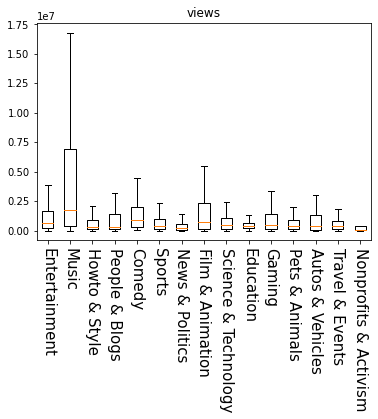

likes: f_score = 63.4383395367562 p_value = 1.3417823975562106e-171


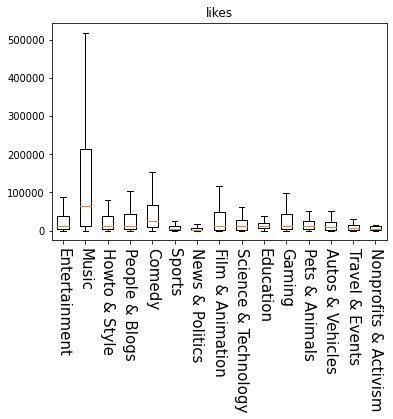

dislikes: f_score = 5.6727080936775875 p_value = 4.131639242032016e-11


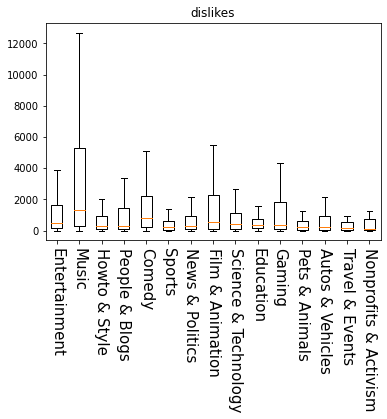

comment_count: f_score = 14.40104240851909 p_value = 7.094228782184063e-35


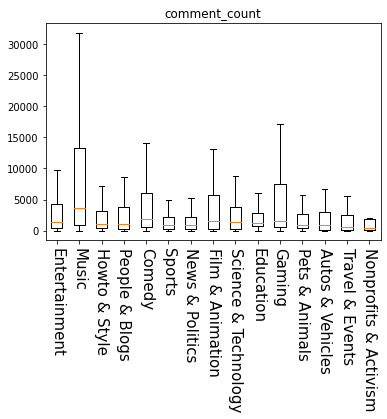

description_len: f_score = 35.28077776411028 p_value = 1.1965109301151156e-93


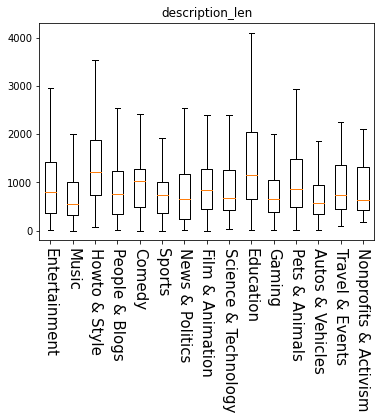

title_len: f_score = 69.97833842678143 p_value = 2.508022805516716e-189


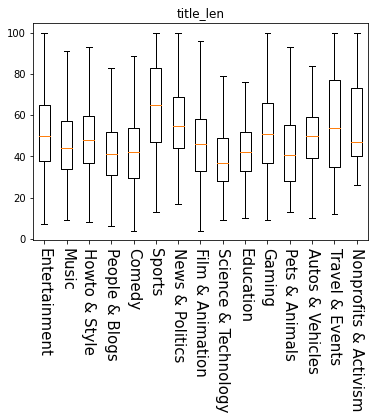

channel_title_len: f_score = 54.26644533116559 p_value = 1.7106414156763909e-146


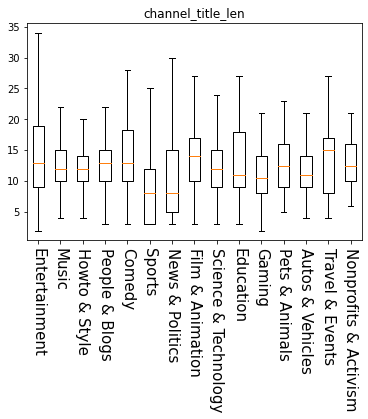

publish_time_day_of_week: f_score = 4.4781752308734175 p_value = 4.232630869892645e-08


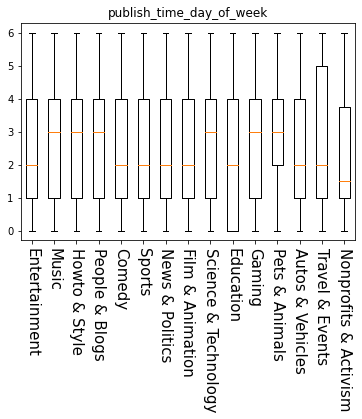

publish_time_hour_of_day: f_score = 19.390014949374397 p_value = 6.799815815987679e-49


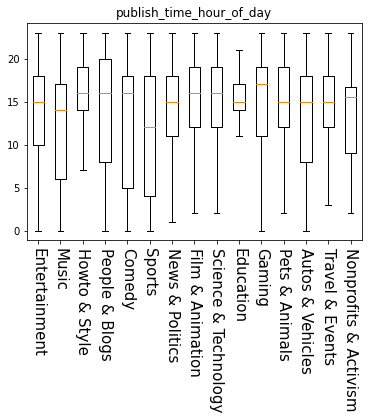

,attr,f score,p value,leq alpha
0,views,42.528430,5.725639e-114,True
1,likes,63.438340,1.341782e-171,True
2,dislikes,5.672708,4.131639e-11,True
3,comment_count,14.401042,7.094229e-35,True
4,description_len,35.280778,1.196511e-93,True
5,title_len,69.978338,2.508023e-189,True
6,channel_title_len,54.266445,1.710641e-146,True
7,publish_time_day_of_week,4.478175,4.232631e-08,True
8,publish_time_hour_of_day,19.390015,6.799816e-49,True


In [39]:
categories_data = []
for category_id in categories:
    c_data = videos[videos["new_category_id"] == category_id]
    N += len(c_data)
    categories_data.append(c_data)

def anova(data: List[pd.DataFrame], attr: str):
    data_set = list(map(lambda x: x[attr].dropna(), data))
    f_score, p_value = stats.f_oneway(
        *data_set
    )
    print(f"{attr}: f_score = {f_score} p_value = {p_value}")
    plt.title(attr)
    plt.boxplot(data_set, showfliers=False)
    labels = [categories_dict[i] for i in categories]
    plt.xticks(np.arange(1, len(labels) + 1), labels, rotation=270, fontsize=15)
    plt.show()
    return f_score, p_value


f_scores = pd.DataFrame()
alpha = 0.05
for i in numeric_attrs:
    f, p = anova(categories_data, i)
    f_scores = f_scores.append(pd.DataFrame(
        data={"attr": [i], "f score": [f], "p value": [p], "leq alpha": [p <= alpha]}
    ), ignore_index=True)
f_scores

Poszczególne kategorie mają różne średnie wartości na wszystkich atrybutach.

## Ocena atrybutów tekstowych

Po podaniu tekstów procesowi tokenizacji zostały wygenerowane dla nich cechy
numeryczne, które wyrażają liczbę występujących częstych tokenów przez liczbę wszyskich
często występujących tokenów dla każdej kategorii na każdym atrybucie.

In [40]:
tokenized_attrs = ["channel_titles", "descriptions", "ocr_text", "titles", "domains", "filtered_ocr_text"]
frequent_attrs = list(filter(lambda x: x.startswith("freq_"), videos.columns.tolist()))
print(frequent_attrs)

['freq_channel_titles_Entertainment', 'freq_channel_titles_Music', 'freq_channel_titles_People & Blogs', 'freq_channel_titles_Howto & Style', 'freq_channel_titles_News & Politics', 'freq_channel_titles_Comedy', 'freq_channel_titles_Sports', 'freq_channel_titles_Travel & Events', 'freq_channel_titles_Gaming', 'freq_channel_titles_Education', 'freq_channel_titles_Pets & Animals', 'freq_channel_titles_Science & Technology', 'freq_channel_titles_Film & Animation', 'freq_channel_titles_Autos & Vehicles', 'freq_channel_titles_Nonprofits & Activism', 'freq_channel_titles_Shows', 'freq_descriptions_Entertainment', 'freq_descriptions_Music', 'freq_descriptions_People & Blogs', 'freq_descriptions_Howto & Style', 'freq_descriptions_News & Politics', 'freq_descriptions_Comedy', 'freq_descriptions_Sports', 'freq_descriptions_Travel & Events', 'freq_descriptions_Gaming', 'freq_descriptions_Education', 'freq_descriptions_Pets & Animals', 'freq_descriptions_Science & Technology', 'freq_descriptions_Fi

## Tytuł kanału

freq_channel_titles_Entertainment: f_score = 138.31168936112303 p_value = 0.0


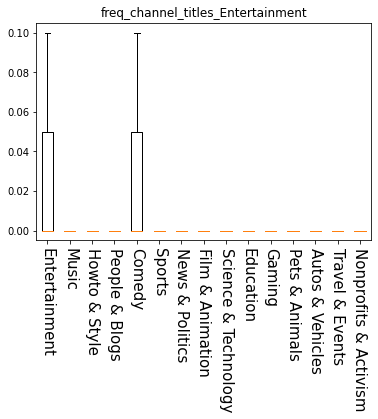

freq_channel_titles_Music: f_score = 43.991996381100904 p_value = 4.781822715237908e-118


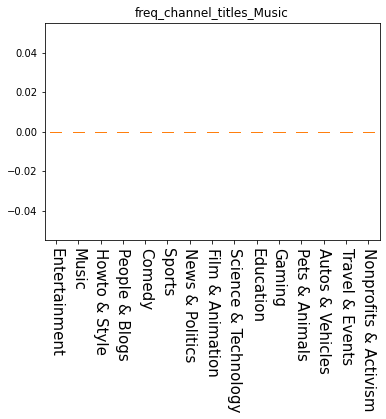

freq_channel_titles_Howto & Style: f_score = 175.86512744164963 p_value = 0.0


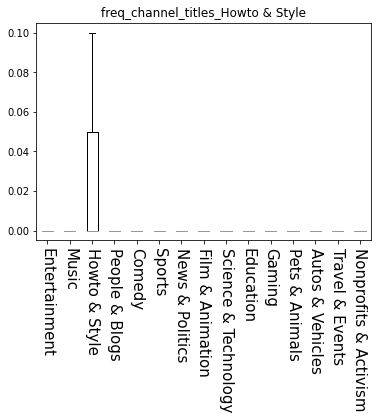

freq_channel_titles_People & Blogs: f_score = 106.1089182226461 p_value = 1.239460510410347e-284


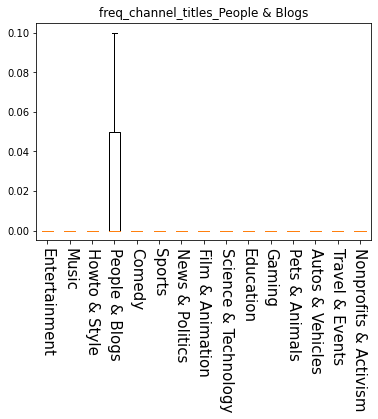

freq_channel_titles_Comedy: f_score = 194.32239420924927 p_value = 0.0


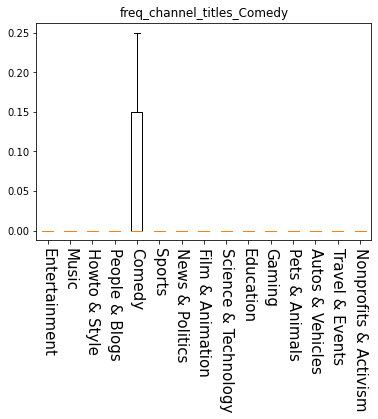

freq_channel_titles_Sports: f_score = 812.4475617285865 p_value = 0.0


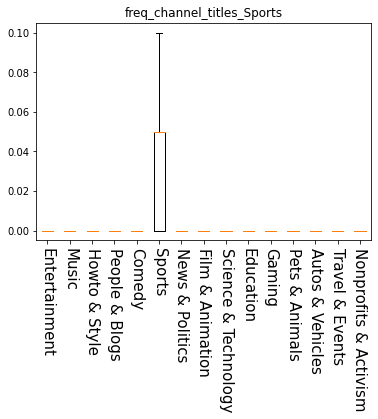

freq_channel_titles_News & Politics: f_score = 646.3219177408613 p_value = 0.0


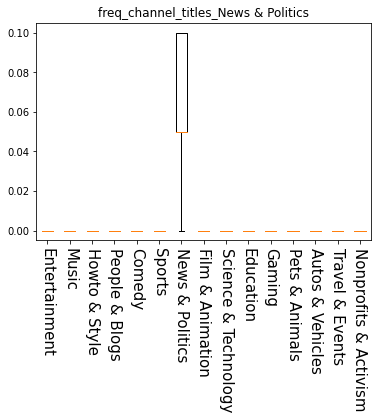

freq_channel_titles_Film & Animation: f_score = 357.7477768567478 p_value = 0.0


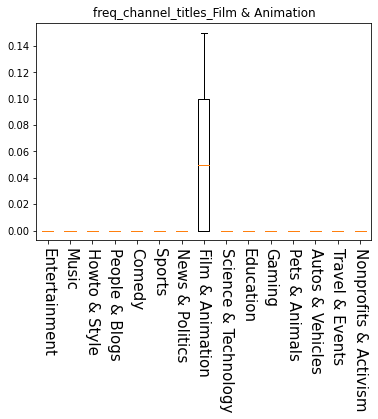

freq_channel_titles_Science & Technology: f_score = 218.82650262337845 p_value = 0.0


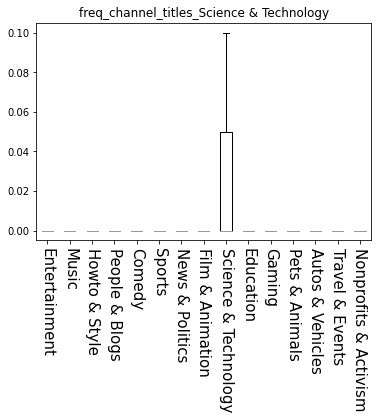

freq_channel_titles_Education: f_score = 354.79778449928733 p_value = 0.0


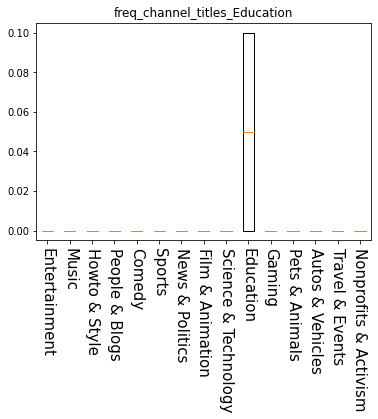

freq_channel_titles_Gaming: f_score = 95.1014806221599 p_value = 4.553165907278875e-256


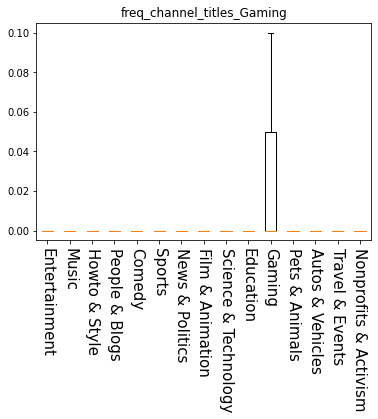

freq_channel_titles_Pets & Animals: f_score = 153.5419010071475 p_value = 0.0


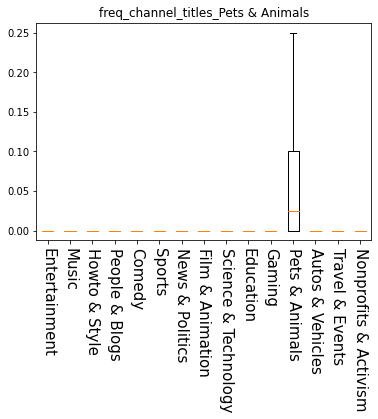

freq_channel_titles_Autos & Vehicles: f_score = 44.65210662426805 p_value = 6.954031370651752e-120


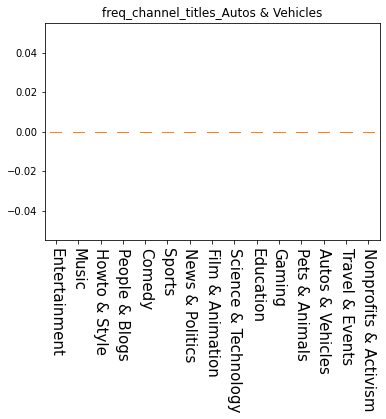

freq_channel_titles_Travel & Events: f_score = 211.09563202981096 p_value = 0.0


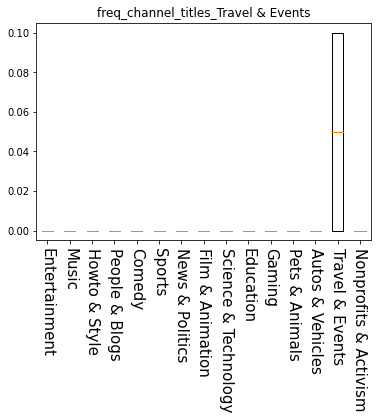

freq_channel_titles_Nonprofits & Activism: f_score = 30.06113656977793 p_value = 5.274798880238771e-79


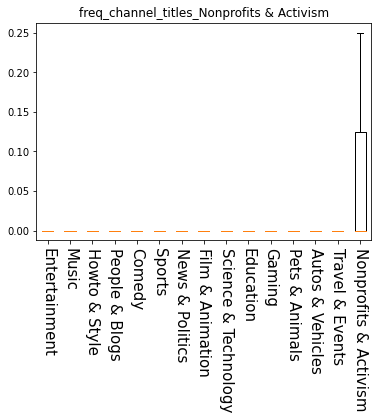

In [41]:
attr = "channel_titles"
for cat in categories:
    attr_name = f"freq_{attr}_{categories_dict[cat]}"
    anova(categories_data, attr_name)

## Tytuł filmu

freq_titles_Entertainment: f_score = 90.97150967624059 p_value = 3.0307636746199144e-245


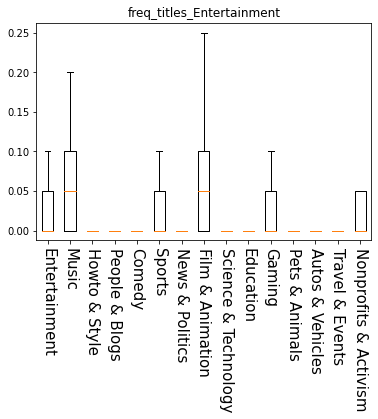

freq_titles_Music: f_score = 272.4358948013861 p_value = 0.0


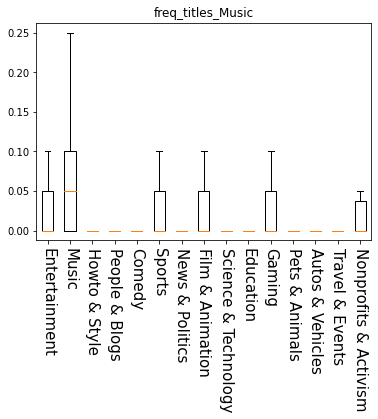

freq_titles_Howto & Style: f_score = 94.69484114173316 p_value = 5.265071806738452e-255


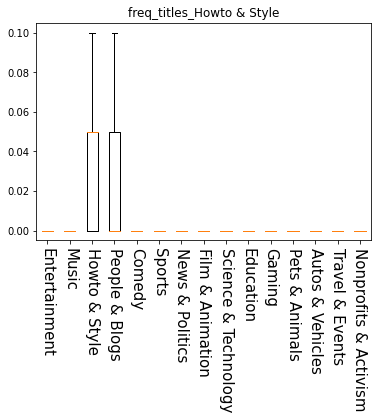

freq_titles_People & Blogs: f_score = 48.416518467511814 p_value = 2.45089458081786e-130


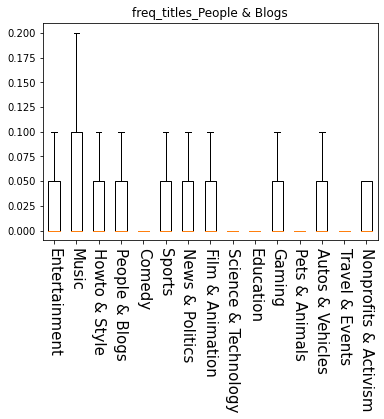

freq_titles_Comedy: f_score = 61.175593571613824 p_value = 1.9733762587861226e-165


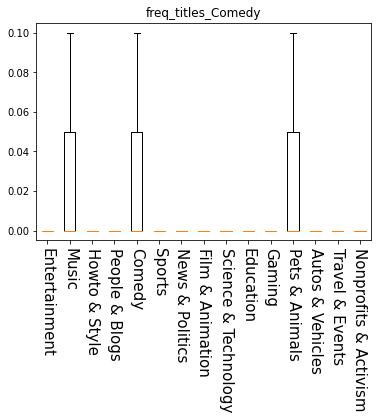

freq_titles_Sports: f_score = 229.4282696763998 p_value = 0.0


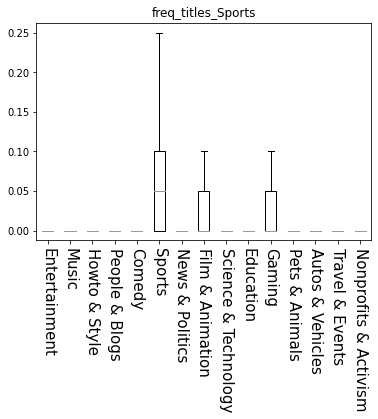

freq_titles_News & Politics: f_score = 63.818746493996585 p_value = 1.237400743087421e-172


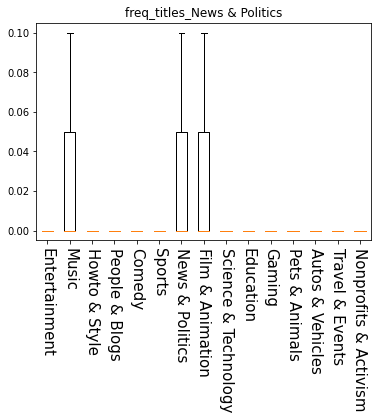

freq_titles_Film & Animation: f_score = 157.26975103619966 p_value = 0.0


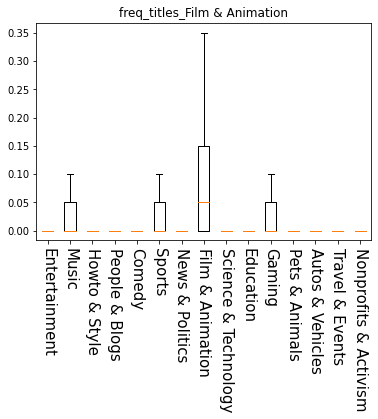

freq_titles_Science & Technology: f_score = 45.511403592409486 p_value = 2.833961613958445e-122


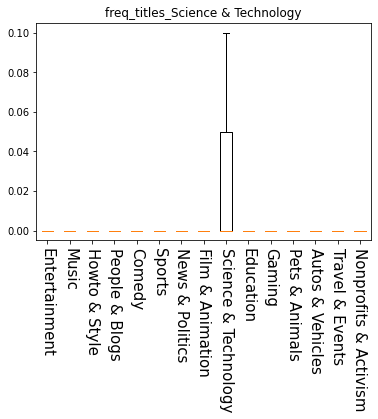

freq_titles_Education: f_score = 16.642919299836862 p_value = 3.676386632444797e-41


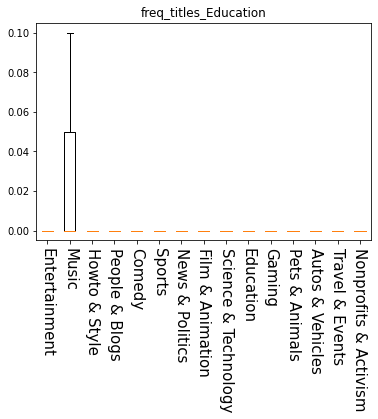

freq_titles_Gaming: f_score = 86.07077319977354 p_value = 2.512550262014155e-232


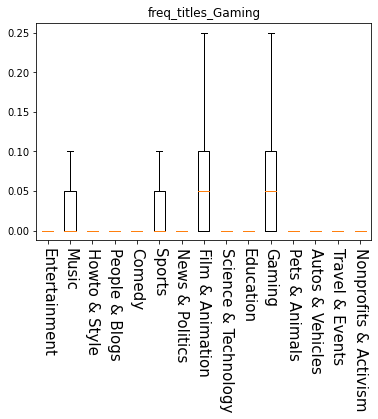

freq_titles_Pets & Animals: f_score = 112.22719206802923 p_value = 2.4612437598926332e-300


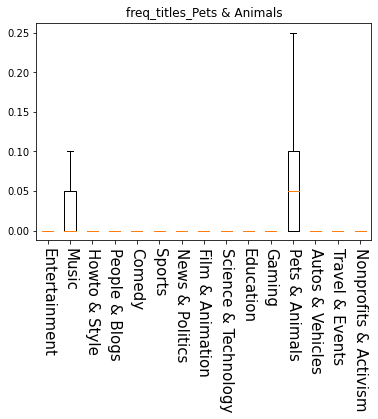

freq_titles_Autos & Vehicles: f_score = 37.3362906768277 p_value = 1.8779605454499027e-99


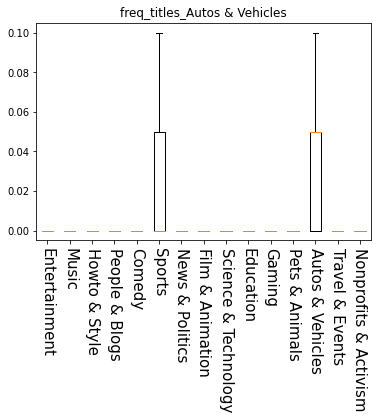

freq_titles_Travel & Events: f_score = 85.56068845898326 p_value = 5.616143335489167e-231


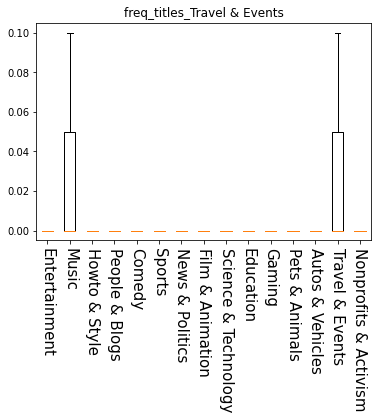

freq_titles_Nonprofits & Activism: f_score = 30.77153712478064 p_value = 5.258185527684053e-81


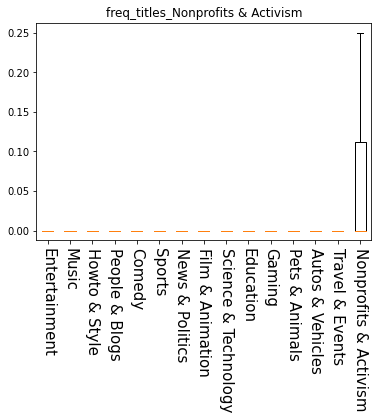

In [42]:
attr = "titles"
for cat in categories:
    attr_name = f"freq_{attr}_{categories_dict[cat]}"
    anova(categories_data, attr_name)


## Opisy filmów

freq_descriptions_Entertainment: f_score = 44.29556836218799 p_value = 6.830764018368688e-119


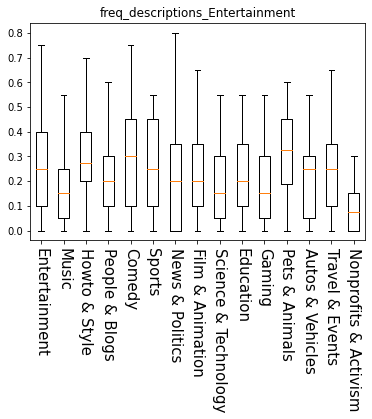

freq_descriptions_Music: f_score = 40.727335306235915 p_value = 6.094559757786883e-109


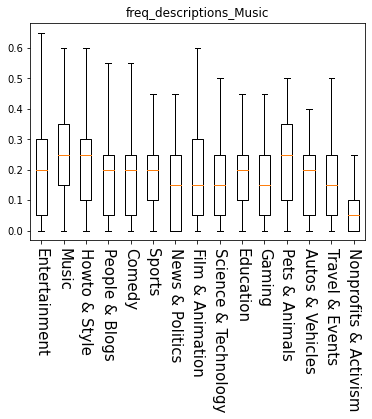

freq_descriptions_Howto & Style: f_score = 68.93129441907558 p_value = 1.6897145383121154e-186


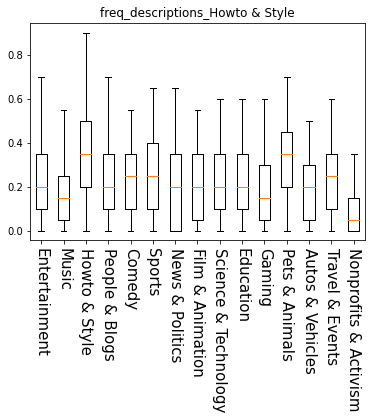

freq_descriptions_People & Blogs: f_score = 39.56658360108933 p_value = 1.0703152792388097e-105


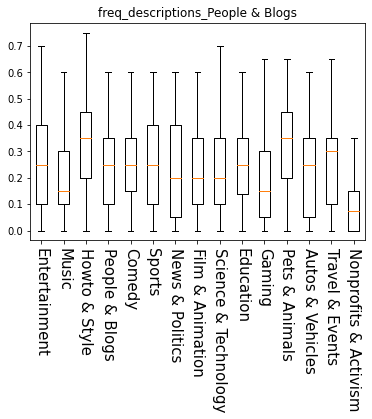

freq_descriptions_Comedy: f_score = 60.35614282884497 p_value = 3.412096513199143e-163


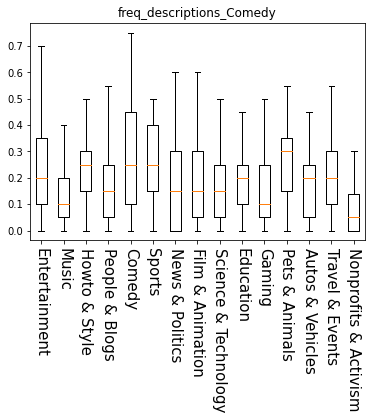

freq_descriptions_Sports: f_score = 85.78979659837641 p_value = 1.3908168043054386e-231


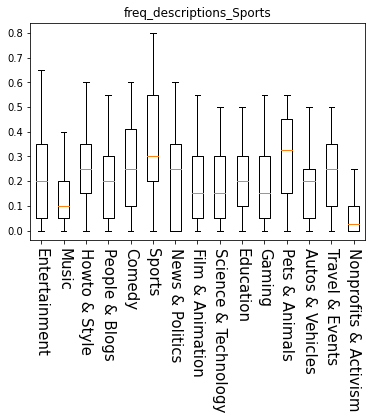

freq_descriptions_News & Politics: f_score = 48.212358089186665 p_value = 9.018220113011574e-130


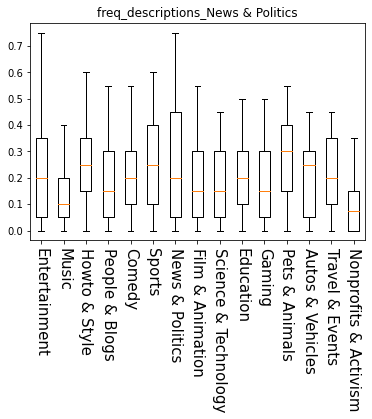

freq_descriptions_Film & Animation: f_score = 38.36161107501394 p_value = 2.5205195519433754e-102


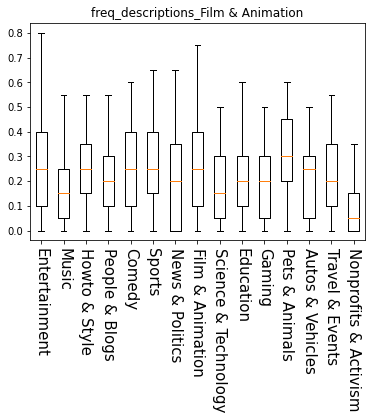

freq_descriptions_Science & Technology: f_score = 55.938881135708314 p_value = 4.310686766650402e-151


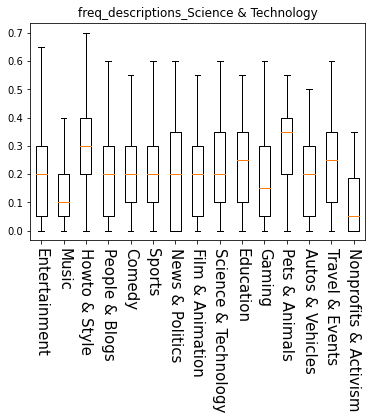

freq_descriptions_Education: f_score = 88.08498525846132 p_value = 1.204012885525447e-237


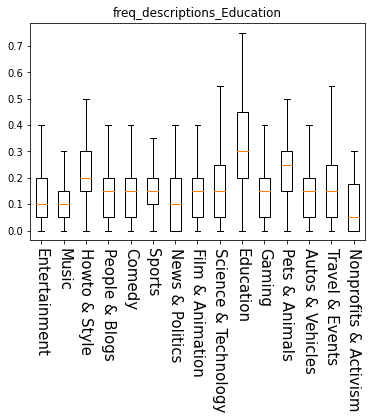

freq_descriptions_Gaming: f_score = 41.93073330520261 p_value = 2.6611767086170513e-112


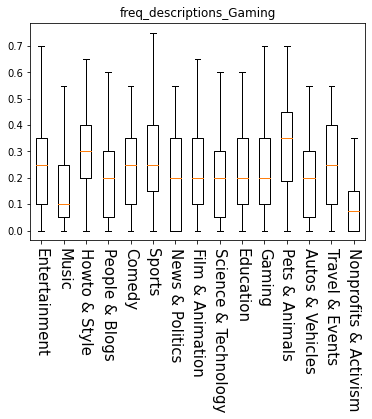

freq_descriptions_Pets & Animals: f_score = 52.3301413912904 p_value = 3.704096998326927e-141


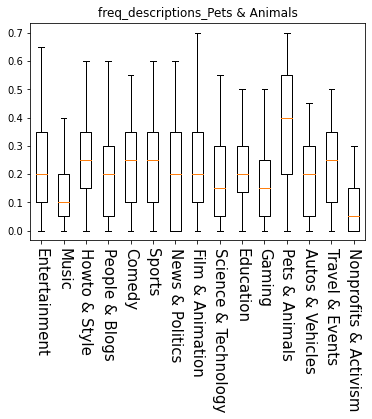

freq_descriptions_Autos & Vehicles: f_score = 41.918983691005785 p_value = 2.869847955791231e-112


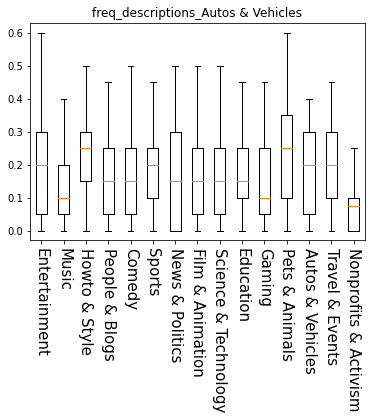

freq_descriptions_Travel & Events: f_score = 66.96131669073287 p_value = 3.6278784453727336e-181


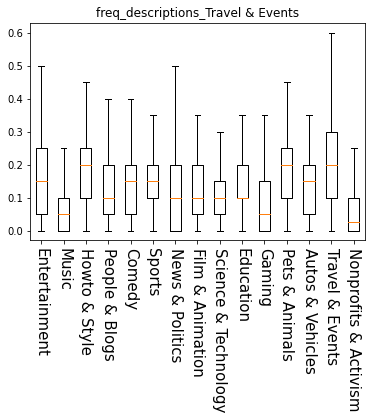

freq_descriptions_Nonprofits & Activism: f_score = 25.739831918332833 p_value = 8.148454558098986e-67


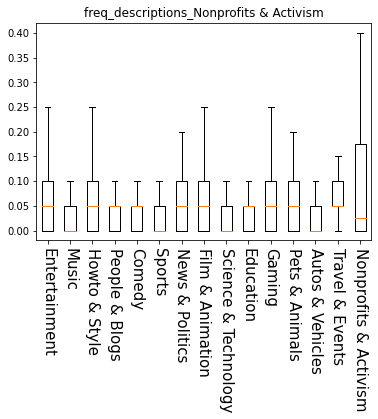

In [43]:
attr = "descriptions"
for cat in categories:
    attr_name = f"freq_{attr}_{categories_dict[cat]}"
    anova(categories_data, attr_name)

## OCR

freq_ocr_text_Entertainment: f_score = 8.987111683670062 p_value = 6.551561507147317e-20


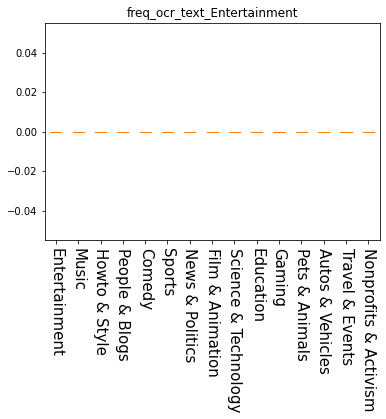

freq_ocr_text_Music: f_score = 11.662840242329104 p_value = 2.9692396643956108e-27


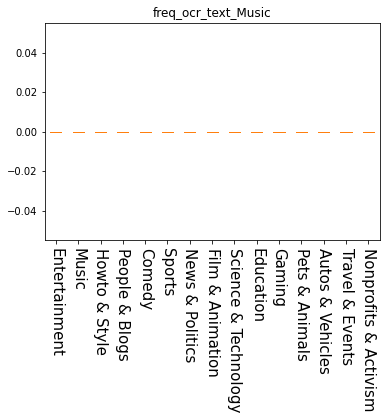

freq_ocr_text_Howto & Style: f_score = 2.265538680934625 p_value = 0.004444689903102106


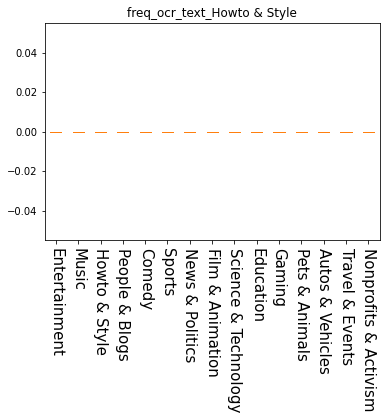

freq_ocr_text_People & Blogs: f_score = 2.6481894326454336 p_value = 0.000732235986920845


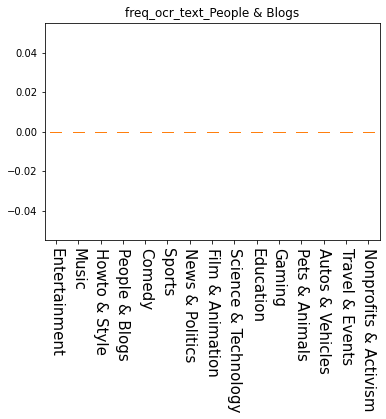

freq_ocr_text_Comedy: f_score = 5.81158779831259 p_value = 1.813419497698451e-11


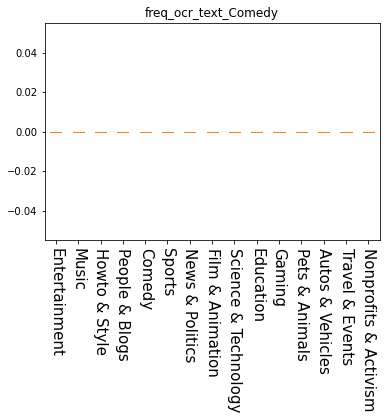

freq_ocr_text_Sports: f_score = 3.6908586967239607 p_value = 3.3439990552787866e-06


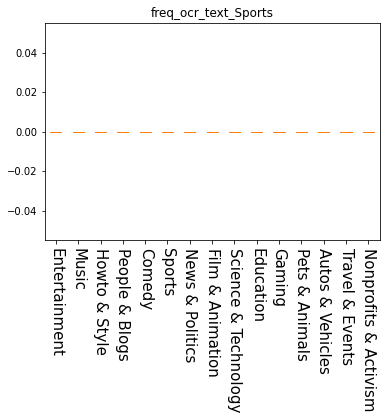

freq_ocr_text_News & Politics: f_score = 3.0232639402173005 p_value = 0.00011273114784566602


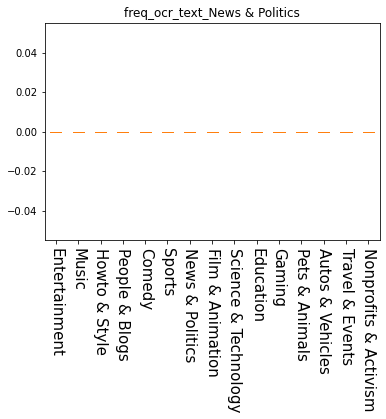

freq_ocr_text_Film & Animation: f_score = 12.215228900358166 p_value = 8.744527232721989e-29


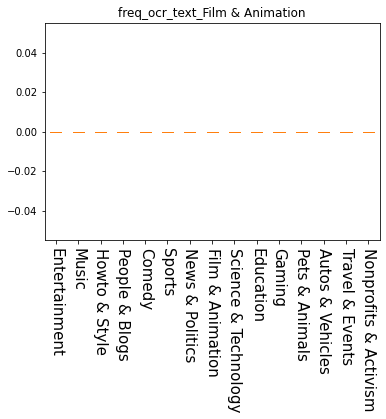

freq_ocr_text_Science & Technology: f_score = 3.208411997320095 p_value = 4.341425850555694e-05


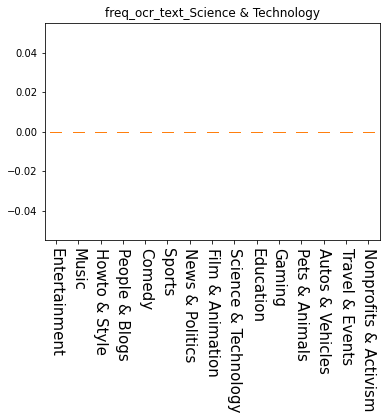

In [ ]:
attr = "ocr_text"
for cat in categories:
    attr_name = f"freq_{attr}_{categories_dict[cat]}"
    anova(categories_data, attr_name)

## Filtered OCR

In [ ]:
attr = "filtered_ocr_text"
for cat in categories:
    attr_name = f"freq_{attr}_{categories_dict[cat]}"
    anova(categories_data, attr_name)

## Domeny

In [ ]:
attr = "domains"
for cat in categories:
    attr_name = f"freq_{attr}_{categories_dict[cat]}"
    anova(categories_data, attr_name)

## TAGI

In [ ]:
attr = "tags"
for cat in categories:
    attr_name = f"freq_{attr}_{categories_dict[cat]}"
    anova(categories_data, attr_name)


## Emocje

In [ ]:
videos["tokenized_emotion"] = videos["emotions"].apply(lambda x: [eval(x)[-1]] if eval(x) else np.nan)
# plot_categories_bars(categories, "emotion", create_tokens_dict=False)

# Atrybuty liczbowe wyekstrahowane z cech obrazków
W poprzenim etapie wydzielone zostały pewne funckje analizujące miniaturki filmów. W celu możliwego przetworzenia ich przez klasyfikator, bez dodawania nadmiernych cech w postaci całego obrazku, każda z cech została sprowadzona do pojednyńczej wartośći określającą odchylenie danego obrazku od średniej dla tej cechy (suma wartości bezwzględnej na pojedyńczych pikselach lub elementach ciągu w przypadku histogramów). Stworzona została również cecha logiczna, która za pomocą OCR determinuje czy na obrazku pojawia się napis "vevo", który był według poprzednich analiz, bardzo częstym elementem obrazków.

## Wartości pikseli w przestrzeni grayscale - gray_mean_score

In [ ]:
attr_name = "gray_mean_score"
anova(categories_data, attr_name)

## Wartości pikseli w przestrzeni RGB (zsumowane)- color_mean_score

In [ ]:
attr_name = "color_mean_score"
anova(categories_data, attr_name)

## Histogram w przestrzeni grayscale - gray_hist_score

In [ ]:
attr_name = "gray_hist_score"
anova(categories_data, attr_name)

## Histogram w przestrzeni RGB (osobno) - red_hist_score, green_hist_score, blue_hist_score

In [ ]:
attr_name = "red_hist_score"
anova(categories_data, attr_name)

attr_name = "green_hist_score"
anova(categories_data, attr_name)

attr_name = "blue_hist_score"
anova(categories_data, attr_name)

## Wykrywanie krawędzi filtrem Canny - edges_score

In [ ]:
attr_name = "edge_score"
anova(categories_data, attr_name)

## Entropia obrazów - entropy_score

In [ ]:
attr_name = "entropy_score"
anova(categories_data, attr_name)


## Atrybuty nominalne

Kolejnymi atrybutami, które zostały poddane statystycznej ocenie są
atrybuty nominalne, do których należą:
- *video_id*,
- *new_video_id*,
- *thumbnail_link*,
- *comments_disabled*,
- *ratings_disabled*,
- *video_error_or_removed*.

W ich przypadku został wykonany test niezależności $$ \chi^2 $$. Ponownie
poziom istotności przyjął wartość $$ \alpha = 0.05 $$. Hipotezy przyjeły postać:

$$ H_0 $$: Zmienne są niezależne.

$$ H_1 $$: Zmienne są zależne.


## Video_id

In [ ]:
contingency = pd.crosstab(videos["video_id"], videos["category_name"], normalize="index")

_, p, _, _ = stats.chi2_contingency(contingency)

print(f"p value: {p}")

P wartość nie pozwala na odrzucenie hipotezy zerowej, zatem nie występuje zależność
kontyngencja między atrybutem kategorii a *video_id*. Jest to spodziewany wynik,
ponieważ atrybut ten pozwala jedynie unikalnie identyfikować filmy, nie wnosi on żadnej
wiedzy na temat zawartości filmu, co za tym idzie o przynależności do danej kategorii.

## New video id

Atrybut, który został wyznaczony z obrobionych linków *thumbnail_link* oraz *video_id*.

In [ ]:
contingency = pd.crosstab(videos["new_video_id"], videos["category_name"], normalize="index")

_, p, _, _ = stats.chi2_contingency(contingency)

print(f"p value: {p}")

Podobnie jak w przypadku oryginalnego identyfikatora z danych nie występuje zależność
pomiędzy nim a kategorią, do której należy reprezentowany przez niego film. Jest to także
spodziewany wynik oceny przydatności atrybutu.

## Thumbnail link

In [ ]:
contingency = pd.crosstab(videos["thumbnail_link"], videos["category_name"], normalize="index")
_, p, _, _ = stats.chi2_contingency(contingency)
print(f"p value: {p}")

Podobnie jak dwa atrybuty odpowiadające za identyfikację filmu także
dla atrybutu *thumbnail link* nie występuje istotna statystycznie zależność
pomiędzy nim oraz kategorią, do której należy film. Także jak dwa poprzednie atrybuty
nie będzie on używany podczas uczenia modeli.

## Comments disabled

In [ ]:
contingency = pd.crosstab(videos["comments_disabled"], videos["category_name"], normalize="index")
_, p, _, _ = stats.chi2_contingency(contingency)
print(f"p value: {p}")

Także ten atrybut nie pozwala dobrze wnioskować o przynależności do poszczególnych
kategorii filmów. Podobnie nie można odrzucić $$ H_0 $$ na rzecz $$ H_1 $$.
Jest to także przewidziany wynik, nie mniej ten atrybut może być przydatny,
kiedy przyjdzie rozróżniać pomiędzy filmami trening i nie trending.

## Ratings disabled

In [ ]:
contingency = pd.crosstab(videos["ratings_disabled"], videos["category_name"], normalize="index")
_, p, _, _ = stats.chi2_contingency(contingency)
print(f"p value: {p}")

Atrybut *ratings_disabled* to kolejny atrybut logiczny, który nie będzie
używany podczas uczenia pół nadzorowanego. Tutaj także nie występuje zależność
pomiędzy nim a kategorią, do której należy film. Podobanie jak poprzeni atrybut
także może okazać się przydatny w rozpoznawaniu filmów trending, taka analiza
zostanie przeprowadzona w etapie 5.

## Video error or removed

In [ ]:
contingency = pd.crosstab(videos["video_error_or_removed"], videos["category_name"], normalize="index")
_, p, _, _ = stats.chi2_contingency(contingency)
print(f"p value: {p}")

Kolejny atrybut, który od samego początku wydawał się nieistotny z punktu
widzenia rozróżniania kategorii filmu. Także nie możemy odrzucić
hipotezy $$ H_0 $$ mówiącej o niezależności tych atrybutów. Podobnie jak poprzednie
atrybuty logiczne ten atrybut może okazać się istotny w etapie 5.

## Trending date - trending_date

In [ ]:
contingency = pd.crosstab(videos["trending_date"], videos["category_name"], normalize="index")
_, p, _, _ = stats.chi2_contingency(contingency)
print(f"p value: {p}")

## Publish time - publish_time

In [ ]:
contingency = pd.crosstab(videos["publish_time"], videos["category_name"], normalize="index")
_, p, _, _ = stats.chi2_contingency(contingency)
print(f"p value: {p}")

## Obecność znaku wodnego vevo - vevo

In [ ]:
contingency = pd.crosstab(videos["vevo"], videos["category_name"], normalize="index")
_, p, _, _ = stats.chi2_contingency(contingency)
print(f"p value: {p}")

## Podsumowanie

### Atrybuty, które pozostają w zbiorze:
- Atrybuty liczbowe:
    - views,
    - likes,
    - comments_count,
    TODO w sumie nie wiem, ale statystycznie różne (te 5)
    - description_len,
    - title_len,
    - channel_title len
    - publish_time_day_of_week
    - publish_time_hour_of_day

- Atrybuty tekstowe w postaci listy tokenów:
    - channel_title,
    - title,
    - description,
    - tags
- Atrybuty tekstowe agregowane do ilości wystąpień słów charakterystycznych:
    - freq_channel_titles.. - dla każdej kategorii,
    - freq_titles... - dla każdej kategorii,
    - freq_tags... - dla każdej kategorii

### Odrzucone atrybuty:
- Atrybuty tekstowe:
    - video_id,
    - new_video_id (pozostanie tylko na potrzeby identyfikacji filmów),
    - trending_date,
    - publish_time,
- Atrybuty wizualne:
    - uzyskane przy pomocy narzędzia OCR,
    - uzyskane przy pomocy narzędzia ekstrakcji emocji,
- Atrybuty tekstowe agregowane do ilości wystąpień słów charakterystycznych:
    - freq_ocr_text... - dla każdej kategorii,
    - freq_filtered_ocr_text... - dla każdej kategorii,
    - freq_domains... - dla każdej kategorii,
    - freq_emotions... - dla każdej z kategorii,
- Atrybuty logiczne:
    - comments_disabled,
    - ratings_disabled,
    - video_error_or_removed



### Zapisanie ostatecznego zbioru danych.

In [ ]:
# TODO